In [1]:
import pandas as pd
import numpy as np
import os
import autolingua
import pycaret
from autolingua import utils

from pycaret.clustering import (setup, create_model, assign_model, plot_model, 
                                evaluate_model, save_model, load_model, pull)

# Cargar archivo excel

In [2]:
# Guardar directorios de trabajo
repo_dir = os.path.dirname(autolingua.__path__[0])
data_dir = os.path.join(repo_dir, 'data')
results_dir = os.path.join(repo_dir, 'results')

In [3]:
# Cargar el archivo excel
codificacion_bruto = pd.read_excel(
    os.path.join(data_dir, 'preseea', 'codificacion.xlsx'), sheet_name='Hoja1')
sociologico_bruto = pd.read_excel(
    os.path.join(data_dir, 'preseea', 'sociologico.xlsx'), sheet_name='Hoja1')

# Filtrado y preprocesamiento de datos

## Codificación

In [4]:
# Eliminar columnas que contienen 'Unnamed' (columnas vacías)
codificacion = codificacion_bruto.loc[:, ~codificacion_bruto.columns.str.contains('Unnamed')]

# Filtrar por columna 'CONTEXTOS OBLIGATORIOS' igual a 3
codificacion = codificacion[codificacion['CONTEXTOS OBLIGATORIOS'] == 3]
codificacion = codificacion[codificacion['CORPUS'] == 2]

# Eliminar las columnas que no nos interesan
columnas_eliminar = ['Minuto', 'CONTEXTO', 'Forma verbal analizada',
                    'CONTEXTOS OBLIGATORIOS', 'CORPUS', 
                    'Posicion del sujeto respecto del verbo', 'Observaciones']
codificacion.drop(columns=columnas_eliminar, inplace=True)

In [5]:
# Eliminar las filas sin datos en la columna 'INFORMANTE'
codificacion = codificacion[codificacion['INFORMANTE'].notna()]

# Eliminar los espacios en blanco antes y después 
# de los nombres de las columnas y de los valores de cada columna
codificacion = utils.remove_blank_spaces(codificacion)

In [6]:
# Corroborar que no hay ninguna casilla vacía (debería dar 0)
codificacion.isnull().any().sum()

0

In [7]:
# Cambiar tipo de datos de las columnas que tengan tipo float64 a int64
for columna in codificacion.columns:
    if codificacion[columna].dtype in ['float64', 'int64']:
        codificacion[columna] = codificacion[columna].astype('int8')

In [8]:
clustering = setup(codificacion, normalize = True, silent=True)

,Description,Value
0,session_id,1211
1,Original Data,"(3394, 38)"
2,Missing Values,False
3,Numeric Features,33
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(3394, 649)"
9,CPU Jobs,-1


In [9]:
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1601,568.1047,1.7628,0,0,0


In [13]:
codificacion.columns

Index(['INFORMANTE', 'Infinitivo', 'Presencia', 'Persona del sujeto',
       'Referente de sujeto', 'Ambigüedad fonética potencial', 'Especificidad',
       'Modo', 'Tiempo verbal', 'Progresividad', 'Perfectividad',
       'Ambigüedad morfologica', 'clase semantica del vb', 'ADESSE',
       'Subtipo ADESSE', 'Tipo de clausula', 'Correferencialidad',
       'Distancia de referente', 'Turno de habla', 'Perífrasis', 'Pronominal',
       'Tipo de discurso', 'Longuitud de la formal verbal', 'Edad', 'Sexo',
       'Nivel de estudios', 'Estatus', 'Edad ent', 'Grado de proximidad ent',
       'Campo PROXIMIDAD', 'Sexo/Campo', 'norMA SEXO', 'S.Y.Z', 'S',
       'entrevistador', 'Hablarbien', 'Modelolengua', 'Modelovariedad'],
      dtype='object')

In [15]:
kmeans_results = assign_model(kmeans)

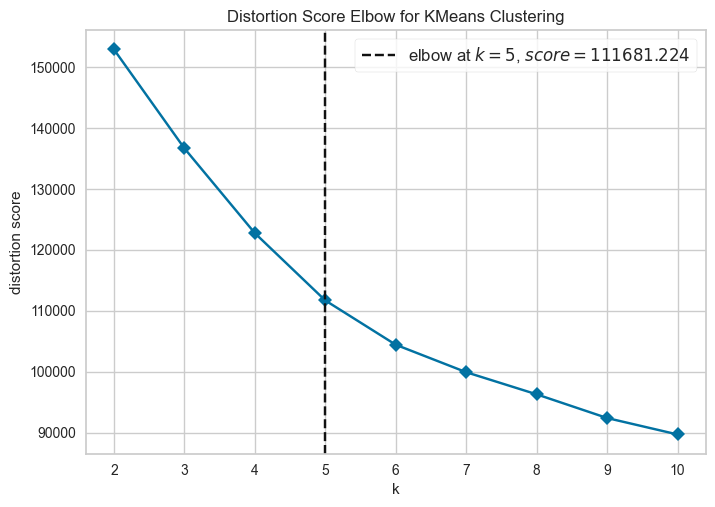

In [16]:
plot_model(kmeans, plot = 'elbow')

In [18]:
evaluate_model(kmeans)

A Jupyter Widget

## Sociológico

In [13]:
# Eliminar columnas que contienen 'Unnamed' (columnas vacías)
sociologico = sociologico_bruto.loc[:, ~sociologico_bruto.columns.str.contains('Unnamed')]

In [ ]:
# Eliminar las columnas que no nos interesan
columnas_eliminar = ['Sujeto']
codificacion.drop(columns=columnas_eliminar, inplace=True)